In [1247]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import pandas as pd

In [1248]:
import warnings
warnings.filterwarnings(action="ignore")

In [1249]:
# Problem 1 
#read in the data description file and print out the description of housing prices data 

file_path = 'house-prices-advanced-regression-techniques/data_description.txt'

with open(file_path, 'r') as file:
    data_content = file.read()

print(data_content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [1250]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [1251]:
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [1252]:
print(train_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [1253]:
first_floor_area = '1stFlrSF'


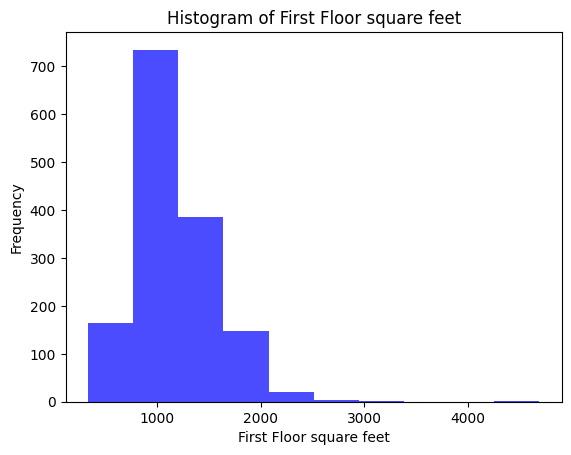

In [1254]:
plt.hist(train_data[first_floor_area], bins=10, color='blue', alpha=0.7)
plt.xlabel('First Floor square feet')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'First Floor square feet')
plt.show()


In [1255]:
full_bath = 'FullBath'

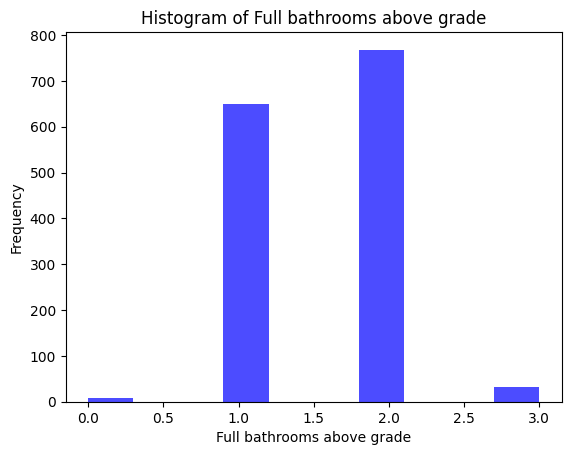

In [1256]:
plt.hist(train_data[full_bath], bins=10, color='blue', alpha=0.7)
plt.xlabel('Full bathrooms above grade')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Full bathrooms above grade')
plt.show()


In [1257]:
# Find missing values
missing_values = train_data.isnull().sum()

# List of features with missing values
features_with_missing_values = missing_values[missing_values > 73].index.tolist()

#print(features_with_missing_values)

# Drop features with missing values
train_data.drop(columns=features_with_missing_values, inplace=True)


# Now, 'missing_values' contains rows where the specified variable has missing values

#Do the above pre-processing steps for the test data 
missing_values_test = test_data.isnull().sum()

# List of features with missing values
test_features_with_missing_values = missing_values_test[missing_values_test > 73].index.tolist()

#print(features_with_missing_values)

# Drop features with missing values
test_data.drop(columns=test_features_with_missing_values, inplace=True)


In [1258]:
# Get a summary of missing values
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

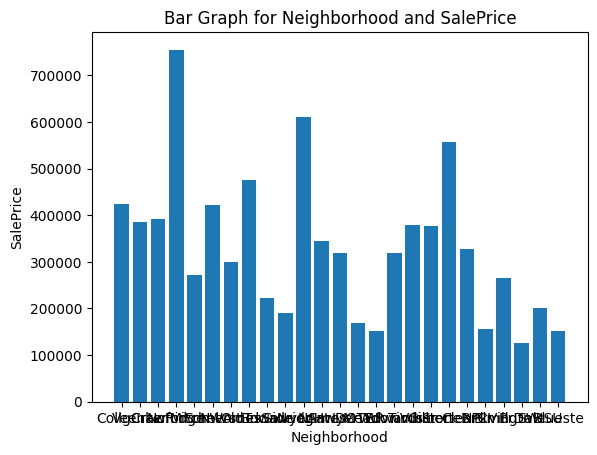

In [1259]:
# Create the bar graph
plt.bar(train_data['Neighborhood'], train_data['SalePrice'])

# Add labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.title('Bar Graph for Neighborhood and SalePrice')

# Show the plot
plt.show()

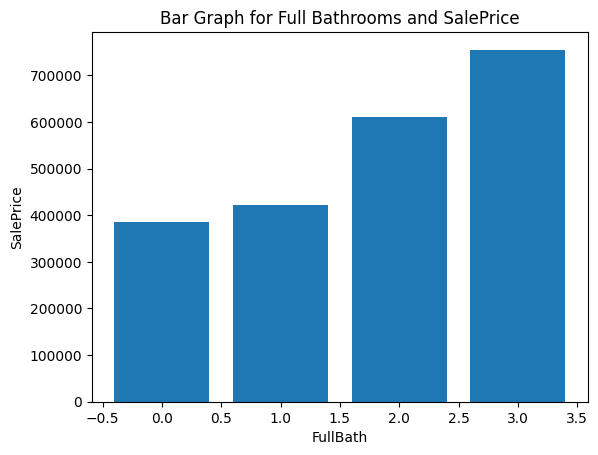

In [1260]:
# Create the bar graph
plt.bar(train_data['FullBath'], train_data['SalePrice'])

# Add labels and a title
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.title('Bar Graph for Full Bathrooms and SalePrice')

# Show the plot
plt.show()

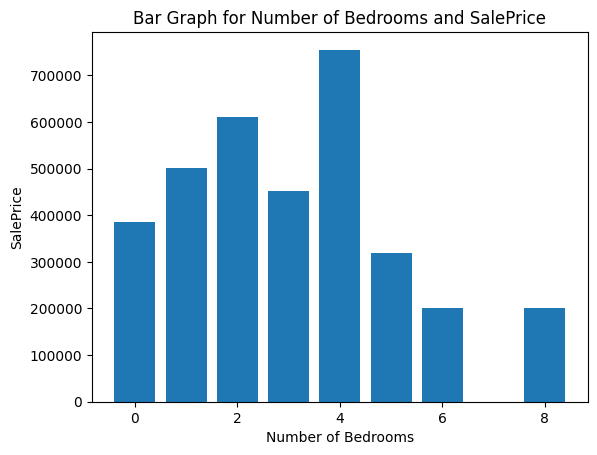

In [1261]:
# Create the bar graph
plt.bar(train_data['BedroomAbvGr'], train_data['SalePrice'])

# Add labels and a title
plt.xlabel('Number of Bedrooms')
plt.ylabel('SalePrice')
plt.title('Bar Graph for Number of Bedrooms and SalePrice')

# Show the plot
plt.show()

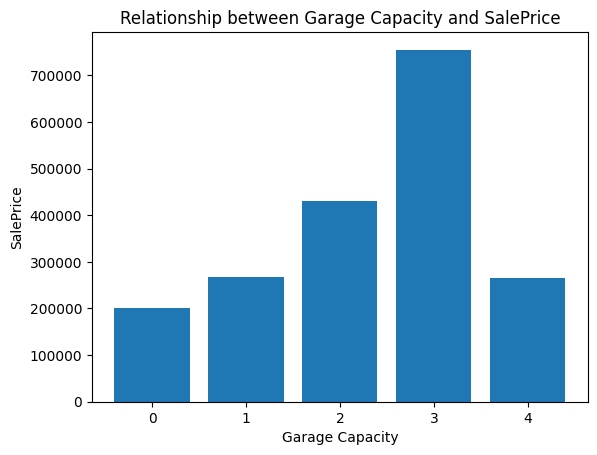

In [1262]:
# Create the bar graph
plt.bar(train_data['GarageCars'], train_data['SalePrice'])

# Add labels and a title
plt.xlabel('Garage Capacity')
plt.ylabel('SalePrice')
plt.title('Relationship between Garage Capacity and SalePrice')

# Show the plot
plt.show()

In [1263]:
## create a for-loop 
# Import necessary libraries


# Separate continuous and categorical features
continuous_features = []
categorical_features = []



for column in train_data.columns:
    if train_data[column].dtype in ['int64', 'float64'] and train_data[column].nunique()>15:
        continuous_features.append(column)
    else:
        categorical_features.append(column)
# remove id from continuous_features
continuous_features.remove('Id')
continuous_features.remove('SalePrice')
# Normalize continuous features
scaler = StandardScaler()
for feature in continuous_features:
    train_data[feature] = scaler.fit_transform(train_data[[feature]])

print(train_data['BedroomAbvGr'])


#create a new feature for bedrooms 

train_data['small_house'] = np.where(train_data['BedroomAbvGr'] <= 2, 1, 0)
train_data['med_house'] = np.where(((train_data['BedroomAbvGr'] >2) & (train_data['BedroomAbvGr'] <5)), 1, 0)
train_data['large_house'] = np.where(train_data['BedroomAbvGr'] >5,1,0)

# want to preserve information about original bedroom variable but do not want to further one-hot encode it

# continuous_features.append('BedroomAbvGr')
# categorical_features.remove('BedroomAbvGr')

# will add BedroomAbvGr to continuous_variable and remove it from cateforial variable 

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(train_data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame for the one-hot encoded features
encoded_data = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Drop the original categorical features
train_data.drop(columns=categorical_features, inplace=True)

# Concatenate the original DataFrame and the one-hot encoded DataFrame
train_data = pd.concat([train_data, encoded_data], axis=1)
i = 0
for column_name in train_data.columns:
    i += 1
    print(column_name)

print(i)

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64
Id
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal
SalePrice
small_house
med_house
large_house
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhoo

In [1264]:

# Separate continuous and categorical features
test_continuous_features = []
test_categorical_features = []



for column in test_data.columns:
    if test_data[column].dtype in ['int64', 'float64'] and test_data[column].nunique()>15:
        test_continuous_features.append(column)
    else:
        test_categorical_features.append(column)
        
test_continuous_features.remove('Id')
# Normalize continuous features
for feature in test_continuous_features:
    test_data[feature] = scaler.fit_transform(test_data[[feature]])

#create a new feature for bedrooms 

test_data['small_house'] = np.where(test_data['BedroomAbvGr'] <= 2, 1, 0)
test_data['med_house'] = np.where(((test_data['BedroomAbvGr'] >2) & (test_data['BedroomAbvGr'] <5)), 1, 0)
test_data['large_house'] = np.where(test_data['BedroomAbvGr'] >5,1,0)

# want to preserve information about original bedroom variable but do not want to further one-hot encode it

# continuous_features.append('BedroomAbvGr')
# categorical_features.remove('BedroomAbvGr')

# will add BedroomAbvGr to continuous_variable and remove it from cateforial variable 

# One-hot encode categorical features
test_encoded_features = encoder.fit_transform(test_data[test_categorical_features])
test_encoded_feature_names = encoder.get_feature_names_out(test_categorical_features)

# Create a DataFrame for the one-hot encoded features
test_encoded_data = pd.DataFrame(test_encoded_features, columns=test_encoded_feature_names)

# Drop the original categorical features
test_data.drop(columns=test_categorical_features, inplace=True)

# Concatenate the original DataFrame and the one-hot encoded DataFrame
test_data = pd.concat([test_data, test_encoded_data], axis=1)
i=0
for column_name in test_data.columns:
    i += 1
    print("'"+column_name+ "',")
print(i)

'Id',
'MSSubClass',
'LotArea',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'ScreenPorch',
'MiscVal',
'small_house',
'med_house',
'large_house',
'MSZoning_FV',
'MSZoning_RH',
'MSZoning_RL',
'MSZoning_RM',
'MSZoning_nan',
'Street_Pave',
'LotShape_IR2',
'LotShape_IR3',
'LotShape_Reg',
'LandContour_HLS',
'LandContour_Low',
'LandContour_Lvl',
'Utilities_nan',
'LotConfig_CulDSac',
'LotConfig_FR2',
'LotConfig_FR3',
'LotConfig_Inside',
'LandSlope_Mod',
'LandSlope_Sev',
'Neighborhood_Blueste',
'Neighborhood_BrDale',
'Neighborhood_BrkSide',
'Neighborhood_ClearCr',
'Neighborhood_CollgCr',
'Neighborhood_Crawfor',
'Neighborhood_Edwards',
'Neighborhood_Gilbert',
'Neighborhood_IDOTRR',
'Neighborhood_MeadowV',
'Neighborhood_Mitchel',
'Neighborhood_NAmes',
'Neighborhood_NPkVill',
'Neighborhood_NWAmes',
'Neighborhood_NoRidge',
'Neighborhood_NridgHt',
'Ne

In [1265]:


# Separate the target variable 'SalePrice' (y) from the features (X)

columns_to_keep_train = [
'LotArea',
'1stFlrSF',
'small_house',
'med_house',
'large_house',
'Neighborhood_Blueste',
'Neighborhood_BrDale',
'Neighborhood_BrkSide',
'Neighborhood_ClearCr',
'Neighborhood_CollgCr',
'Neighborhood_Crawfor',
'Neighborhood_Edwards',
'Neighborhood_Gilbert',
'Neighborhood_IDOTRR',
'Neighborhood_MeadowV',
'Neighborhood_Mitchel',
'Neighborhood_NAmes',
'Neighborhood_NPkVill',
'Neighborhood_NWAmes',
'Neighborhood_NoRidge',
'Neighborhood_NridgHt',
'Neighborhood_OldTown',
'Neighborhood_SWISU',
'Neighborhood_Sawyer',
'Neighborhood_SawyerW',
'Neighborhood_Somerst',
'Neighborhood_StoneBr',
'Neighborhood_Timber',
'Neighborhood_Veenker',
'FullBath_1',
'FullBath_2',
'FullBath_3',
'GarageCars_1',
'GarageCars_2',
'GarageCars_3',
'GarageCars_4',
'YrSold_2007',
'YrSold_2008',
'YrSold_2009',
'YrSold_2010',
'SaleType_CWD',
'SaleType_Con',
'SaleType_ConLD',
'SaleType_ConLI',
'SaleType_ConLw',
'SaleType_New',
'SaleType_Oth',
'SaleType_WD',
'SaleCondition_AdjLand',
'SaleCondition_Alloca',
'SaleCondition_Family',
'SaleCondition_Normal',
'SaleCondition_Partial']
columns_to_keep_test = ['LotArea',
'1stFlrSF',
'small_house',
'med_house',
'large_house',
'FullBath_1',
'FullBath_2',
'FullBath_3',
'GarageCars_1.0',
'GarageCars_2.0',
'GarageCars_3.0',
'GarageCars_4.0',
'Neighborhood_Blueste',
'Neighborhood_BrDale',
'Neighborhood_BrkSide',
'Neighborhood_ClearCr',
'Neighborhood_CollgCr',
'Neighborhood_Crawfor',
'Neighborhood_Edwards',
'Neighborhood_Gilbert',
'Neighborhood_IDOTRR',
'Neighborhood_MeadowV',
'Neighborhood_Mitchel',
'Neighborhood_NAmes',
'Neighborhood_NPkVill',
'Neighborhood_NWAmes',
'Neighborhood_NoRidge',
'Neighborhood_NridgHt',
'Neighborhood_OldTown',
'Neighborhood_SWISU',
'Neighborhood_Sawyer',
'Neighborhood_SawyerW',
'Neighborhood_Somerst',
'Neighborhood_StoneBr',
'Neighborhood_Timber',
'Neighborhood_Veenker',
'YrSold_2007',
'YrSold_2008',
'YrSold_2009',
'YrSold_2010',
'SaleType_CWD',
'SaleType_Con',
'SaleType_ConLD',
'SaleType_ConLI',
'SaleType_ConLw',
'SaleType_New',
'SaleType_Oth',
'SaleType_WD',
'SaleCondition_AdjLand',
'SaleCondition_Alloca',
'SaleCondition_Family',
'SaleCondition_Normal',
'SaleCondition_Partial']
len(columns_to_keep_test)
HousePrices_y = train_data['SalePrice']  # Target variable
HousePrices_X= train_data[columns_to_keep]  # Only contains the features which I want in my model 


TestHousePrices_X= test_data[columns_to_keep_test]
TestHousePrices_X.rename(columns={'GarageCars_1.0': 'GarageCars_1', 'GarageCars_2.0': 'GarageCars_2','GarageCars_3.0': 'GarageCars_3','GarageCars_4.0': 'GarageCars_4'}, inplace=True)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
#HousePricesX_train, HousePricesX_test, HousePricesy_train, HousePricesy_test = train_test_split(HousePrices_X, HousePrices_y, test_size=0.2, random_state=42)

# X_train and y_train will contain 80% of the data for training
# X_test and y_test will contain the remaining 20% for testing
i = 0
for column_name in HousePrices_X.columns:
    i +=1 
    print(column_name)
print(i)

LotArea
1stFlrSF
small_house
med_house
large_house
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
FullBath_1
FullBath_2
FullBath_3
GarageCars_1
GarageCars_2
GarageCars_3
GarageCars_4
YrSold_2007
YrSold_2008
YrSold_2009
YrSold_2010
SaleType_CWD
SaleType_Con
SaleType_ConLD
SaleType_ConLI
SaleType_ConLw
SaleType_New
SaleType_Oth
SaleType_WD
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal
SaleCondition_Partial
53


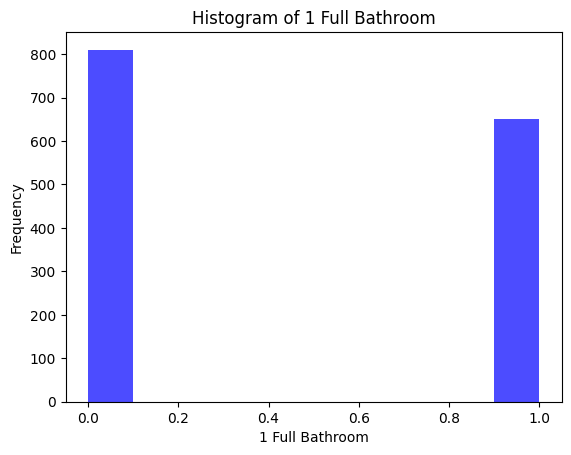

In [1266]:
plt.hist(train_data['FullBath_1'], bins=10, color='blue', alpha=0.7)
plt.xlabel('1 Full Bathroom')
plt.ylabel('Frequency')
plt.title('Histogram of ' + '1 Full Bathroom')
plt.show()

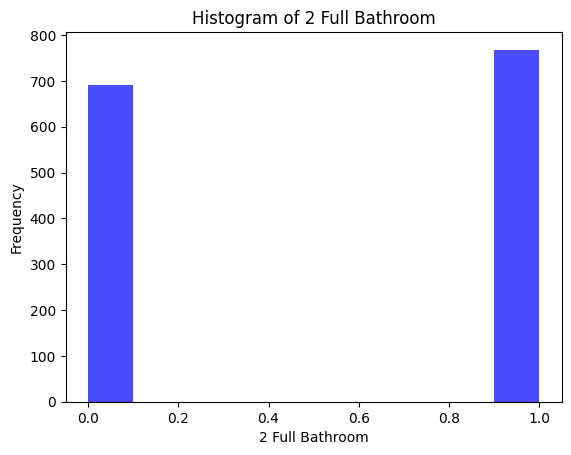

In [1267]:
plt.hist(train_data['FullBath_2'], bins=10, color='blue', alpha=0.7)
plt.xlabel('2 Full Bathroom')
plt.ylabel('Frequency')
plt.title('Histogram of ' + '2 Full Bathroom')
plt.show()

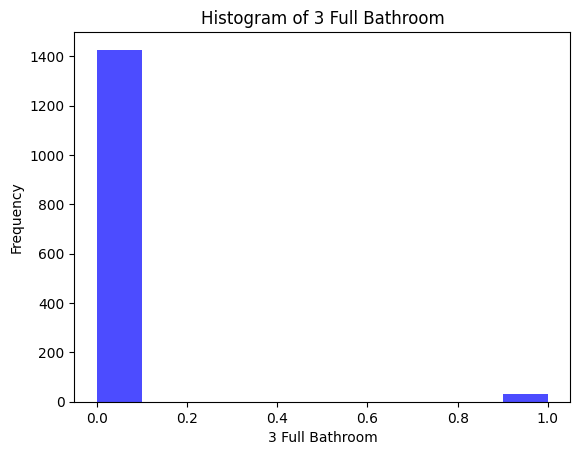

In [1268]:
plt.hist(train_data['FullBath_3'], bins=10, color='blue', alpha=0.7)
plt.xlabel('3 Full Bathroom')
plt.ylabel('Frequency')
plt.title('Histogram of ' + '3 Full Bathroom')
plt.show()

In [1172]:
# def ordinary_least_squares(X, y):
#     # Add a bias term (intercept) to X
#     X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
#     # Calculate the coefficients using the OLS formula
#     beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
#     return beta


y_train = HousePrices_y.values
X_train = HousePrices_X.values 
X_test = TestHousePrices_X.values

In [1173]:
# add a constant term 
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

In [1174]:
# Calculate the coefficients using OLS formula
XtX = np.dot(X_train.T, X_train)
XtX_inv = np.linalg.inv(XtX)
Xty = np.dot(X_train.T, y_train)
beta = np.dot(XtX_inv, Xty)

In [1175]:
y_train_pred = np.dot(X_train, beta)


In [1176]:
# Assuming 'y_true' is the true target values and 'y_pred' is the predicted values
r_squared = r2_score(y_train, y_train_pred)

print("R-squared:", r_squared)


R-squared: 0.7639886202406287


In [1177]:
y_pred = np.dot(X_test, beta)
y_pred_2d = y_pred.reshape(1, -1)
y_pred_unscaled = scaler.inverse_transform(y_pred_2d)

print(y_pred_unscaled)

[[1.00270644e+08 1.22196224e+08 1.65901216e+08 ... 1.17428435e+08
  9.21803790e+07 1.09334394e+08]]


In [1178]:
submission = { 
    'Id': test_data['Id'],
    'SalePrice': y_pred_unscaled[0]
}

In [1179]:
solution = pd.DataFrame(submission)
solution['Id'] = solution['Id'].astype('int')
solution.to_csv('submission.csv',index=False)

In [1180]:
# Problem 2
# We are reading in the test and train data
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

In [1181]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [1182]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


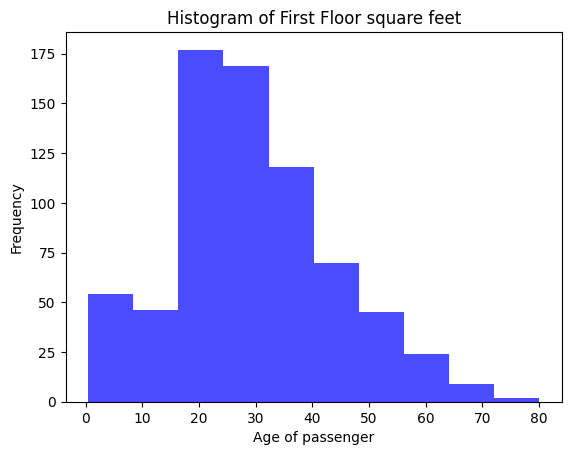

In [1183]:
plt.hist(train_data['Age'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Age of passenger')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'First Floor square feet')
plt.show()

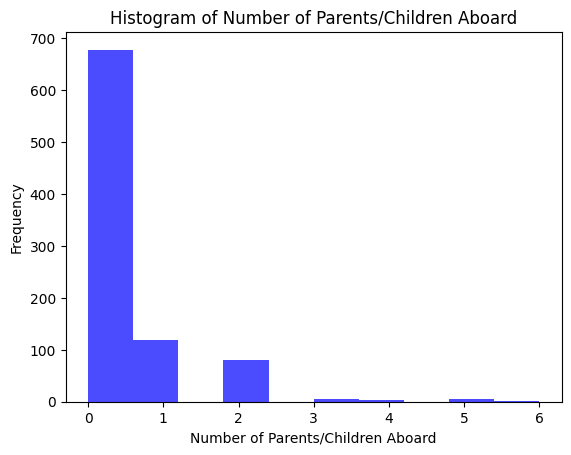

In [1184]:
plt.hist(train_data['Parch'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Number of Parents/Children Aboard')
plt.show()

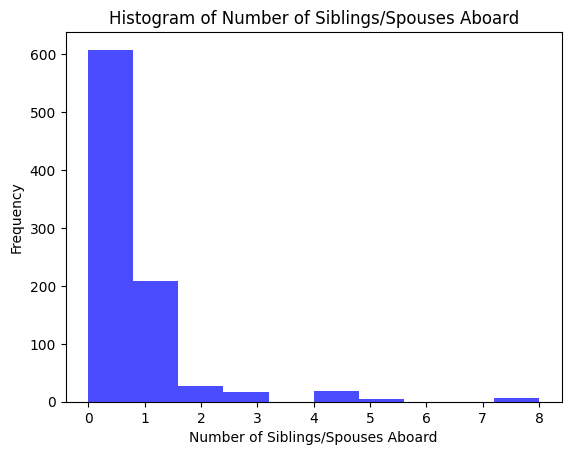

In [1185]:
plt.hist(train_data['SibSp'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Number of Siblings/Spouses Aboard')
plt.show()

In [1186]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1187]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1188]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

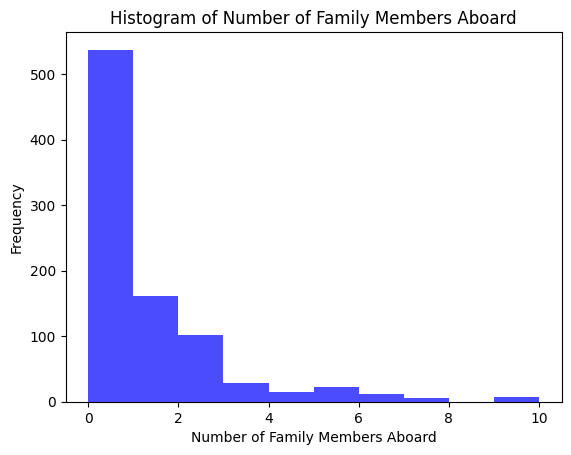

In [1189]:
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp']
test_data['FamilySize'] = test_data['Parch'] + test_data['SibSp']

plt.hist(train_data['FamilySize'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Number of Family Members Aboard')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Number of Family Members Aboard')
plt.show()

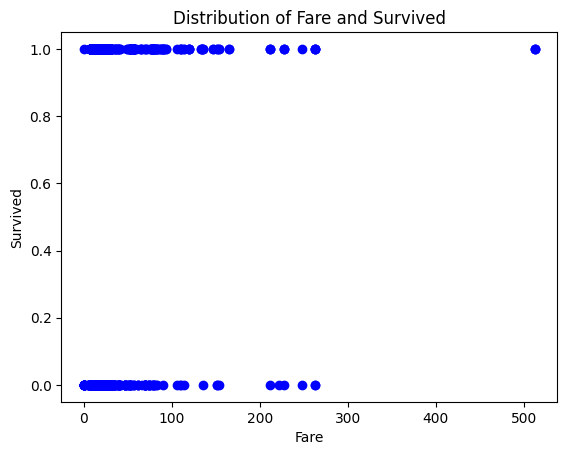

In [1190]:
# Create the scatterplot
plt.scatter(train_data['Fare'], train_data['Survived'], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Distribution of Fare and Survived')

# Display the plot
plt.show()

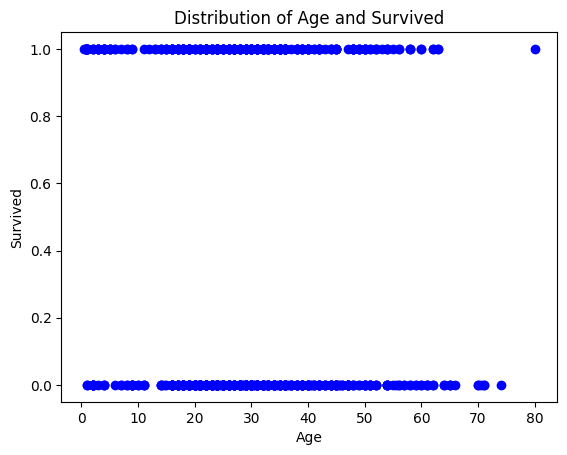

In [1191]:
# Create the scatterplot
plt.scatter(train_data['Age'], train_data['Survived'], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Distribution of Age and Survived')

# Display the plot
plt.show()

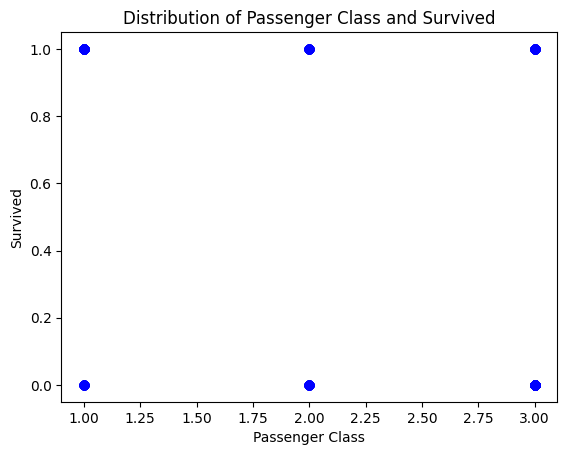

In [1192]:
# Create the scatterplot
plt.scatter(train_data['Pclass'], train_data['Survived'], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.title('Distribution of Passenger Class and Survived')

# Display the plot
plt.show()

In [1193]:
train_data['BigFamily'] = np.where(train_data['FamilySize'] >= 3, 1, 0)
test_data['BigFamily'] = np.where(test_data['FamilySize'] >= 3, 1, 0)

In [1194]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())

In [1195]:
# Cabin has too many missing values, we are dropping cabin 
train_data = train_data.drop(columns='Cabin')
test_data = test_data.drop(columns='Cabin')

In [1196]:
## Fill in missing values for Embarked in TrainData 
embarked_mode_value = train_data['Embarked'].mode()[0]

train_data['Embarked'].fillna(embarked_mode_value, inplace=True)

# The obs below has a missing age value that .isnull() does not register

train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
BigFamily      0
dtype: int64

In [1197]:
# Normalize the variables 
# Separate continuous and categorical features
continuous_features = []
categorical_features = []

for column in train_data.columns:
    if train_data[column].dtype in ['int64', 'float64'] and train_data[column].nunique()>15:
        continuous_features.append(column)
    else:
        categorical_features.append(column)


## What features do we want to use for our model? Age, Fare, Pclass, Sex, Embarked, BigFamily. We remove the rest. 
# continuous_features.remove('PassengerId')
# delete_categorical_features = ['Survived', 'Name', 'SibSp', 'Parch', 'Ticket','FamilySize', 'BigFamily']

# for elem in delete_categorical_features: 
#     categorical_features.remove(elem)

for item in continuous_features: 
    print("continuous_features : " + item)

for cat_item in categorical_features: 
    print("categorical_features : " + cat_item)

normalize_features = ['Age', 'Fare']
hot_encode_features = ['Pclass','Sex','Embarked']

continuous_features : PassengerId
continuous_features : Age
continuous_features : Fare
categorical_features : Survived
categorical_features : Pclass
categorical_features : Name
categorical_features : Sex
categorical_features : SibSp
categorical_features : Parch
categorical_features : Ticket
categorical_features : Embarked
categorical_features : FamilySize
categorical_features : BigFamily


In [1198]:
# Normalize continuous features
scaler = StandardScaler()
for feature in normalize_features:
    train_data[feature] = scaler.fit_transform(train_data[[feature]])
    test_data[feature] = scaler.fit_transform(test_data[[feature]])



In [1199]:
# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(train_data[hot_encode_features])
encoded_feature_names = encoder.get_feature_names_out(hot_encode_features)

test_encoded_features = encoder.fit_transform(test_data[hot_encode_features])
test_encoded_feature_names = encoder.get_feature_names_out(hot_encode_features)

In [1200]:
# Create a DataFrame for the one-hot encoded features
encoded_data = pd.DataFrame(encoded_features, columns=encoded_feature_names)
test_encoded_data = pd.DataFrame(test_encoded_features, columns=test_encoded_feature_names)
# Drop the original categorical features
train_data.drop(columns=hot_encode_features, inplace=True)
#Drop the original categorical features from the test data 
test_data.drop(columns=hot_encode_features, inplace=True)
# Concatenate the original DataFrame and the one-hot encoded DataFrame
train_data = pd.concat([train_data, encoded_data], axis=1)

#Concatenate the original DataFrame and the one-hot encoded DataFrame for test_data 
test_data = pd.concat([test_data, test_encoded_data], axis=1)

train_data.to_csv('train_data.csv',index=False)
#train_data = train_data.dropna()
print(train_data.isna().sum())
print(test_data.isna().sum())
#test_data = test_data.dropna()
## After we have one hot encoded the features, what do we want to drop? 
columns_to_drop = ['PassengerId','Name','SibSp', 'Parch', 'Ticket','FamilySize', 'Survived']
y_train = train_data['Survived']
X_train = train_data.drop(columns=columns_to_drop)
X_testId = test_data['PassengerId']
columns_to_drop_test = ['PassengerId','Name','SibSp', 'Parch', 'Ticket','FamilySize']
X_test =  test_data.drop(columns=columns_to_drop_test)

PassengerId    0
Survived       0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
FamilySize     0
BigFamily      0
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64
PassengerId    0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
FamilySize     0
BigFamily      0
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [1201]:
print(X_train.columns)

Index(['Age', 'Fare', 'BigFamily', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [1202]:
print(X_test.columns)

Index(['Age', 'Fare', 'BigFamily', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [1203]:
X_test.isnull().sum()
X_test = X_test[X_test['Fare'].notna()]

In [1204]:
X_test.isna().sum()
## fit model 
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [1205]:
## apply the model 
y_pred = model.predict(X_test)
submission = { 
    'PassengerId': X_testId,
    'Survived': y_pred
}